In [1]:
from quantileRegression import quantileRegression

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tables

Welcome to ROOTaaS 6.06/08


In [2]:
qr_mc = quantileRegression("mc")

# This is what you want to correct
print "Load the mc dataframe"
startEvtmc = 0 
stopEvtmc  = 2000000
qr_mc.loadDF("/afs/cern.ch/user/m/mdonega/public/forPasquale/ntNoIso/mc/",
             "cicNoSigmaIetaIeta/trees/",
             ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
             startEvtmc, stopEvtmc, 12345)

Load the mc dataframe
NT branches: 
['rho', 'nvtx', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13T

In [3]:
import ROOT as RT

In [4]:
RT.gROOT.LoadMacro("../phoIsoStoch/IsolationCorrection.C++")

0

Info in <TUnixSystem::ACLiC>: creating shared library /mnt/t3nfs01/data01/shome/musella/Analysis/jupyter/dataMC/MTR/./../phoIsoStoch/IsolationCorrection_C.so


In [5]:
isoCorr = RT.IsolationCorrection("../phoIsoStoch/corrections.root")

In [6]:
def applyCorr(row):
    rho,eta,iso = row['rho'],np.abs(row['ScEta']),row['PhoIso03']
    return iso+isoCorr.getExtra(eta,rho)

def applySample(row):
    rho,eta,iso = row['rho'],np.abs(row['ScEta']),row['PhoIso03']
    return isoCorr.getExtra(eta,rho,1)

qr_mc.df['PhoIso03_corr'] = qr_mc.df[['rho','ScEta','PhoIso03']].apply(applyCorr,axis=1)
qr_mc.df['PhoIso03_smpl'] = qr_mc.df[['rho','ScEta','PhoIso03']].apply(applySample,axis=1)

In [7]:
def applySample1p3(row):
    rho,eta,iso = row['rho'],np.abs(row['ScEta']),row['PhoIso03']
    return isoCorr.getExtra(eta,rho,1.3)

qr_mc.df['PhoIso03_smpl1p3'] = qr_mc.df[['rho','ScEta','PhoIso03']].apply(applySample1p3,axis=1)

In [8]:
df = qr_mc.df

In [9]:
df['isEB'] = df[['ScEta']].apply(lambda x: (np.abs(x['ScEta']) < 1.5),axis=1).astype(np.bool)

In [10]:
df['isEB'].describe()

count     2000000
unique          2
top          True
freq      1665214
Name: isEB, dtype: object

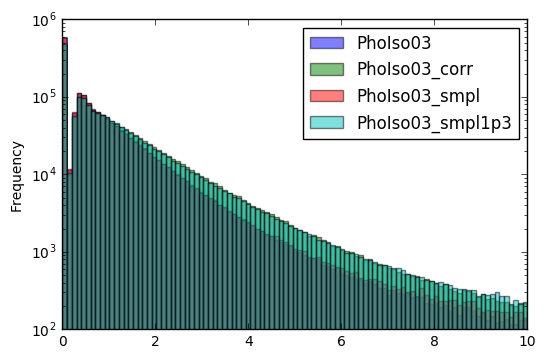

In [11]:
axEB = df[ df['isEB'] > 0 ][['PhoIso03','PhoIso03_corr','PhoIso03_smpl','PhoIso03_smpl1p3']].plot(kind='hist', xlim=(0,10),alpha=0.5,logy=True,bins=np.linspace(0,10,100))

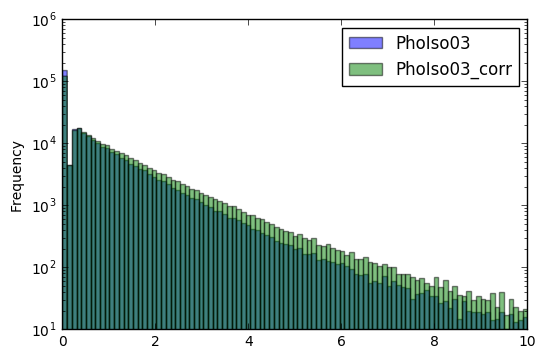

In [12]:
df[ df['isEB'] <= 0  ][['PhoIso03','PhoIso03_corr']].plot(kind='hist', xlim=(0,10),alpha=0.5,logy=True,bins=np.linspace(0,10,100))

In [13]:
# Plot data, mc, mc_corrr
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvtdata = 0
stopEvtdata   = -1
print "Load the data dataframe"
qr_data.loadDF("/afs/cern.ch/user/m/mdonega/public/forPasquale/ntNoIso/ichep/",
               "cicNoSigmaIetaIeta/trees/",
               ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
               startEvtdata, stopEvtdata )
df_data = qr_data.getDF()

Load the data dataframe
NT branches: 
['rho', 'nvtx', 'leadHLT_Ele27_WPTight_Gsf_vMatch', 'subleadHLT_Ele27_WPTight_Gsf_vMatch', 'leadEleMatch', 'subleadEleMatch', 'leadPt', 'leadScEta', 'leadPhi', 'leadR9', 'leadS4', 'leadSigmaIeIe', 'leadEtaWidth', 'leadPhiWidth', 'leadCovarianceIphiIphi', 'leadSigmaRR', 'leadScEnergy', 'leadCovarianceIetaIphi', 'leadPhoIso03', 'leadChIso03', 'leadChIso03worst', 'leadScPreshowerEnergy', 'leadPhoIDMVA', 'subleadPt', 'subleadScEta', 'subleadPhi', 'subleadR9', 'subleadS4', 'subleadSigmaIeIe', 'subleadEtaWidth', 'subleadPhiWidth', 'subleadCovarianceIphiIphi', 'subleadSigmaRR', 'subleadScEnergy', 'subleadCovarianceIetaIphi', 'subleadPhoIso03', 'subleadChIso03', 'subleadChIso03worst', 'leadScPreshowerEnergy', 'subLeadPhoIDMVA']
['cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9', 'cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9']
Adding trees into a DataFrame
  adding  c

In [14]:
df_data['isEB'] = df_data[['ScEta']].apply(lambda x: (np.abs(x['ScEta']) < 1.5),axis=1).astype(np.bool)

In [28]:
def data_mc(df_mc,df_data,bins):
    
    hist_mc_uncorr,_ = np.histogram(df_mc['PhoIso03'].values, density=True, bins=bins)
    hist_mc_corr,_ = np.histogram(df_mc['PhoIso03_corr'].values, density=True, bins=bins)

    hist_data,_ =  np.histogram(df_data['PhoIso03'].values, density=False, bins=bins)

    hist_mc_uncorr *= hist_data.sum()/hist_mc_uncorr.sum()
    hist_mc_corr *= hist_data.sum()/hist_mc_corr.sum()
    
    
    return hist_mc_uncorr,hist_mc_corr,hist_data


        

In [36]:
bins=np.linspace(0,10,100)

binw=0.1

uncorr,corr,data = data_mc( df[ (df['isEB']>0)], 
                           df_data[(df_data['isEB']>0)], bins  )

<Container object of 3 artists>

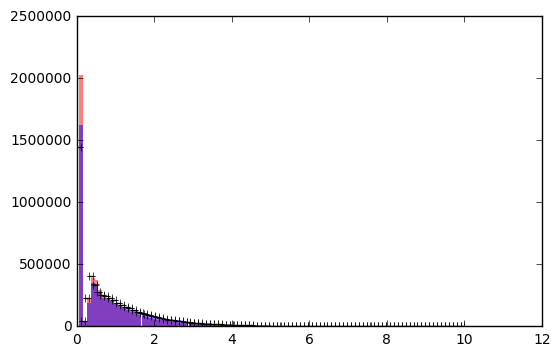

In [37]:
fig = plt.figure()

xc = bins[1:]-binw*0.5

plt.bar(xc,uncorr,width=binw,label='uncorr',alpha=0.5,color='red',linewidth=0.)
plt.bar(xc,corr,width=binw,label='corr',alpha=0.5,color='blue',linewidth=0.)
plt.errorbar( xc, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black' )
#fig.axes[0].set_yscale('log')

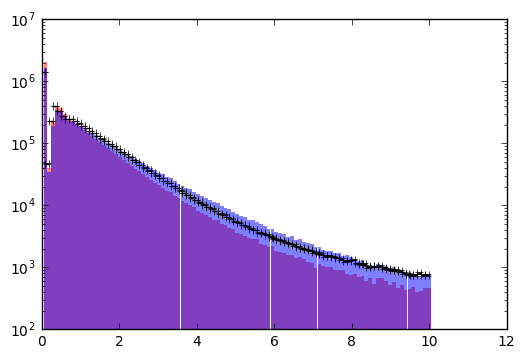

In [39]:
fig = plt.figure()

xc = bins[1:]-binw*0.5

plt.bar(xc,uncorr,width=binw,label='uncorr',alpha=0.5,color='red',linewidth=0.)
plt.bar(xc,corr,width=binw,label='corr',alpha=0.5,color='blue',linewidth=0.)
plt.errorbar( xc, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black' )
fig.axes[0].set_yscale('log')

In [41]:
bins=np.linspace(0,10,100)

binw=0.1

uncorr,corr,data = data_mc( df[ (df['isEB']==0)], 
                           df_data[(df_data['isEB']==0)], bins  )

<Container object of 3 artists>

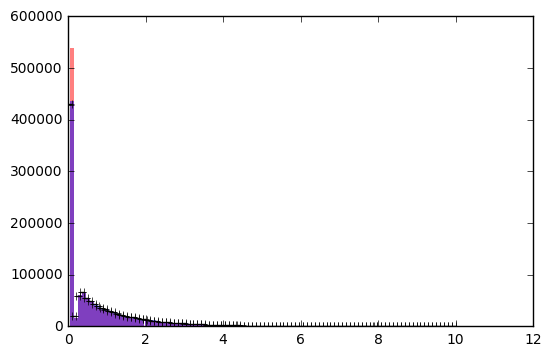

In [42]:
fig = plt.figure()

xc = bins[1:]-binw*0.5

plt.bar(xc,uncorr,width=binw,label='uncorr',alpha=0.5,color='red',linewidth=0.)
plt.bar(xc,corr,width=binw,label='corr',alpha=0.5,color='blue',linewidth=0.)
plt.errorbar( xc, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black' )
#fig.axes[0].set_yscale('log')

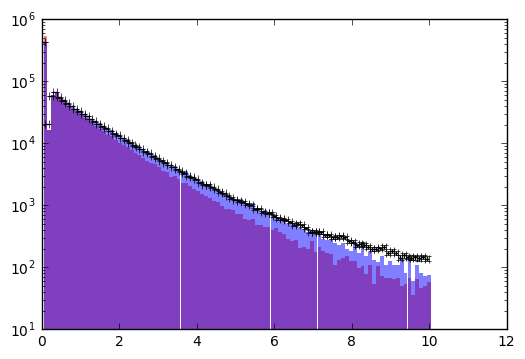

In [43]:
fig = plt.figure()

xc = bins[1:]-binw*0.5

plt.bar(xc,uncorr,width=binw,label='uncorr',alpha=0.5,color='red',linewidth=0.)
plt.bar(xc,corr,width=binw,label='corr',alpha=0.5,color='blue',linewidth=0.)
plt.errorbar( xc, data,ls='None', xerr=np.ones_like(data)*binw*0.5, yerr=np.sqrt(data), color='black' )
fig.axes[0].set_yscale('log')